In [124]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns
import plotly
import plotly.express as px

In [125]:
churn_data = pd.read_csv('data/churn.csv')
churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [126]:
churn_data = churn_data.drop(['RowNumber'], axis=1)

In [159]:
mask = churn_data['Exited'] == 0 #  В отсортированной таблице будут только клиенты со значением 0
mask1 = churn_data['Balance'] > 0 # С любым балансом
#mask2 = churn_data['Age'] != 25 # Возраст не равен 25. В маске делаем только то по какому признаку фильтруем, ниэе как именно фильтруем
sorted = churn_data[mask&mask1].sort_values(
    by=['Balance', 'Exited',],
    ascending=True,
    ignore_index=True
)
sorted

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15776467,De Salis,702,Spain,Female,35,8,14262.80,2,1,0,54689.16,0
1,15741416,Yegorov,707,France,Male,42,2,16893.59,1,1,1,77502.56,0
2,15674156,Tretiakova,810,Germany,Male,69,3,27288.43,1,1,1,110509.90,0
3,15715638,Ch'ang,824,Germany,Male,77,3,27517.15,2,0,1,2746.41,0
4,15598485,Pinto,567,Spain,Male,40,8,28649.64,1,1,1,95140.62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4841,15780212,Mao,592,France,Male,37,4,212692.97,1,0,0,176395.02,0
4842,15620268,Thomson,634,Germany,Male,43,3,212696.32,1,1,0,115268.86,0
4843,15769818,Moore,850,France,Female,37,3,212778.20,1,0,1,69372.88,0
4844,15599131,Dilke,650,Germany,Male,26,4,214346.96,2,1,0,128815.33,0


In [128]:
churn_data['Balance'].sort_values()

0            0.00
5148         0.00
5143         0.00
5142         0.00
5141         0.00
          ...    
6717    216109.88
3588    221532.80
8733    222267.63
3280    238387.56
2092    250898.09
Name: Balance, Length: 10000, dtype: float64

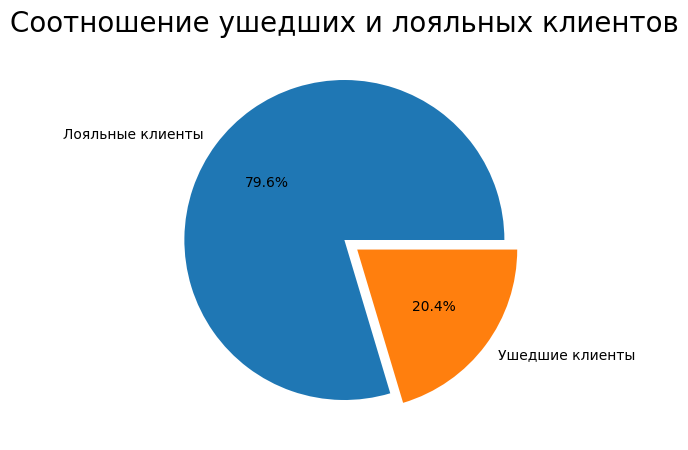

In [129]:
# Задание 9.1
total_exited = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(4, 6))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    total_exited,
    labels = ['Лояльные клиенты', 'Ушедшие клиенты', ],
    autopct='%.1f%%',
    explode = [0, 0.1]
    

);
axes.set_title('Cоотношение ушедших и лояльных клиентов', fontsize = 20);

In [ ]:
# # По графику выше видно, что число лояльных клиентов больше чем ушедших в 4 раза.

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: Balance, dtype: float64
250898.09


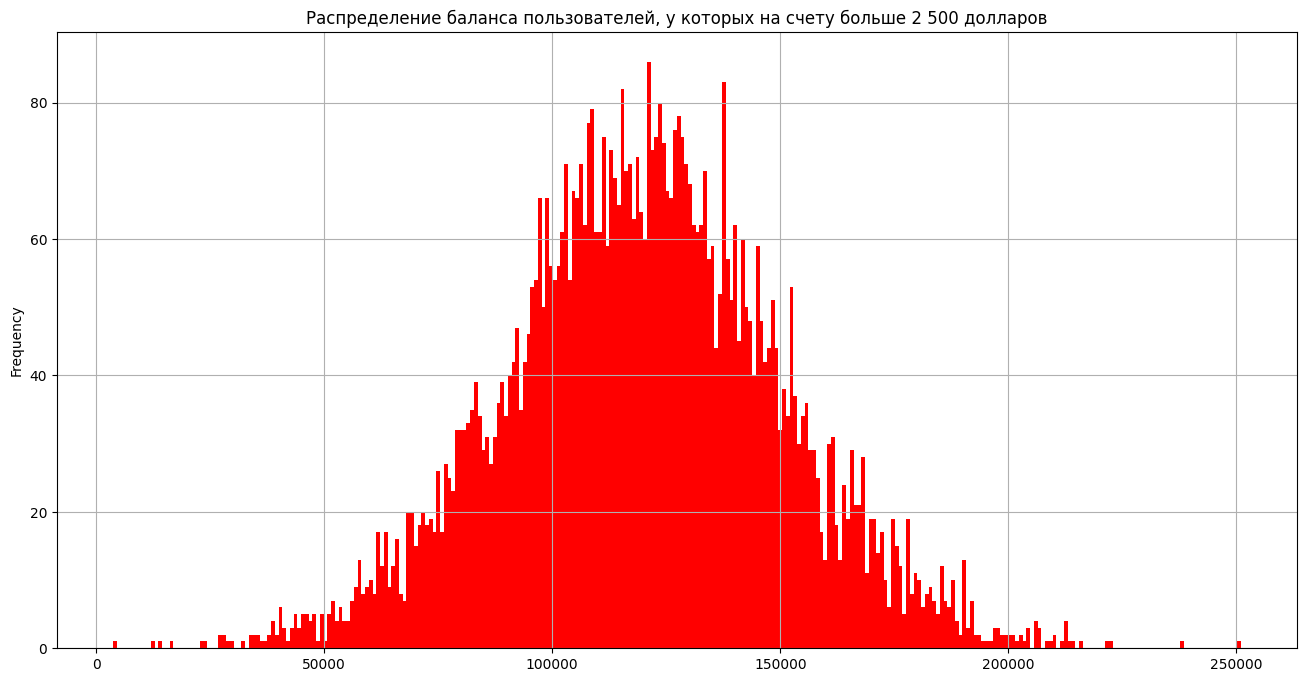

In [130]:
# Задание 9.2
balance = churn_data['Balance'] > 2500 #  Фильтруем клиентов с балансов больше 2500 доллсров.
balance = churn_data[balance]['Balance']  # Сортируем по строке баланс.
print(balance.describe())
print(balance.max())
balance.plot(
    kind= 'hist',
    figsize= (16, 8),
    grid=True,
    bins = 300,
    color = 'red', 
    title= 'Распределение баланса пользователей, у которых на счету больше 2 500 долларов',
);

In [ ]:
# Распределение является нормальным.
# Подавялющее большинство клиентов  имеют на счету больше 50 тыс. дллларов, и меьнше 200 тыс. долларов.
#?? Среднее значение, все данные из метода !!!balance.describe

In [153]:
churn_data.describe()


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [139]:
# Задание 9.3
fig = px.box(data_frame = churn_data ,
             x='Balance',
             color = 'Exited',
             title = 'Распределение баланса клиента в разрезе признака оттока.',
             width= 1000
             )
fig.data[0].name='ушедшие'
fig.data[1].name='лояльные'
fig.show()

In [ ]:
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов?  
# У ушедших клиентов максимальная сумма на счете больше, чем у лояльных на 30тыс. доларов. Медианное значение у лояльных клиентов меньше. 
# Первый квартиль соответсвует минимальному значению, то есть 0 долларов на счету у лояльных клиентов. 
#### У ушедших клиентов первый квартиль, т.е. 25%, соответсвует 37.8 тыс. долларов
#Третий квартиль у обоих групп примерно одинаковый, с разницой в 5 тыс долларов больше у ушедших.
## У >40% лояльных клиентов баланс 0

# С чем связано:
# Ушедших клиентов явно больше средсвт на счетах, и меньше минимально значени. Возможно клиентам не выгодно деоажть средства в банке из за маньшего процента по вкладам, чем в других.



In [161]:
#9.4 Посмотрите на распределение возраста в разрезе признака оттока.
fig = px.box(data_frame = churn_data ,
             x='Age',
             color = 'Exited',
             title = 'Распределение возраста клиента в разрезе признака оттока.',
             width= 1000
             )
fig.data[0].name='ушедшие'
fig.data[1].name='лояльные'
fig.show()


In [ ]:
# 1. В какой группе больше потенциальных выбросов? 
# 2. На какую возрастную категорию клиентов стоит обратить внимание банку?
# 1 Больше потанциальых выбрасов у лояльной группы клиентов.
# 2 Обратить внимание стоит на группу клиентов в возрасте от 38 до 51 года.